In [71]:
#load library
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from scipy import datasets
from openpiv.tools import imread
from pylab import *
import cv2

In [112]:
#LOAD IMAGE AND SHIFT
# Load the image with four channels
#impo_im 
impo_im= cv2.imread('pattern1.5M0.05 (2).png', cv2.IMREAD_UNCHANGED)
image_mean=impo_im-mean(impo_im, axis=(0,1)) #equation 2
image=image_mean[:, :, 0]
#shift image vertically
image_shifted_vertically = shift(image,shift= (-12, -8),mode='reflect')

image_shifted_both_directions = shift(image, (-200, 100),mode='reflect')

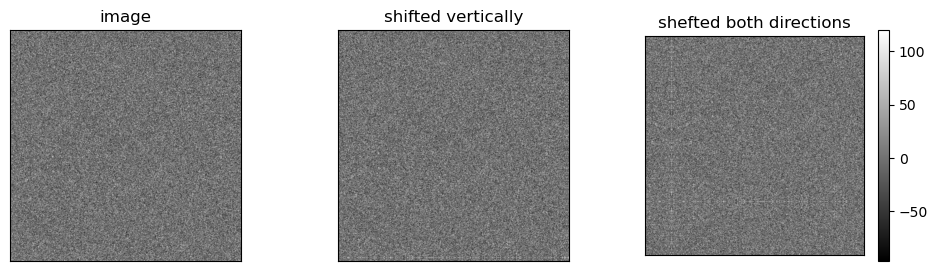

In [113]:
#plot images
# Set a larger figure size
figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])
#colorbar()

# Plotting phase spectrum
plt.subplot(1, 3, 2)
plt.imshow(image_shifted_vertically, cmap='gray')  # 'hsv' colormap for phase
plt.title('shifted vertically'), plt.xticks([]), plt.yticks([])
#colorbar()

# Plotting phase spectrum
plt.subplot(1, 3, 3)
plt.imshow(image_shifted_both_directions, cmap='gray')  # 'hsv' colormap for phase
plt.title('shefted both directions'), plt.xticks([]), plt.yticks([])
colorbar()

plt.show()

In [114]:
a=image[:, :]
b=image_shifted_vertically[:, :]

In [122]:
#correlate2d

def correlate2d(image1, image2):

    #Fourier 
    I_1 = np.fft.rfft2(image1)  #equation 3
    I_2 = np.fft.rfft2(image2)  #equation 3

    #cross power spectrum 
    CPS= I_1*I_2.conjugate() #equation 6
    NCPS= CPS/ np.abs(CPS)

    #cross-correlation
    R_1= fftshift(np.fft.irfft2(NCPS)) #equation 10 #real(R_1)

    return R_1


-3 4


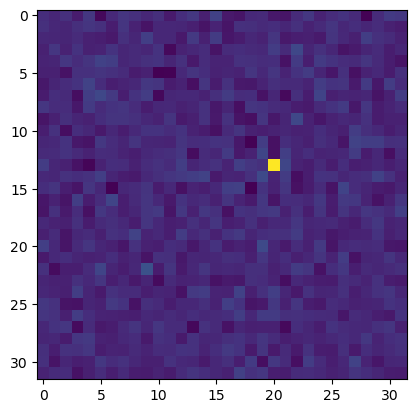

In [129]:
ia = image[:32,:32]
plt.imshow(ia)
ib = shift(ia,shift= (-3, 4),mode='reflect') #(shift in x, shift in y)
plt.imshow(ib)
R = correlate2d(ib,ia)
plt.imshow(real(R))
i,j = unravel_index(R.argmax(),R.shape)
print(i-16,j-16) #relative to the center of the image

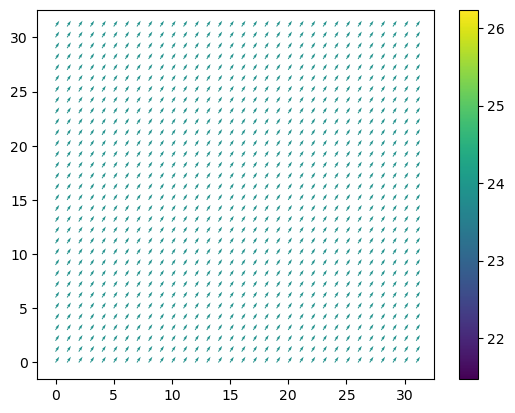

In [133]:
# Get the shape of the image array
rows, cols = ia.shape

# Create x and y coordinates using meshgrid
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
u=i
v=j
M = sqrt(pow(array(u), 2) + pow(array(v), 2))

quiver(x,y,u,v,M)
colorbar()

In [132]:
ia.shape

(32, 32)

In [76]:
#phase_shift 
def phase_shift(image1, image2):

    R_1=correlate2d(image1,image2)
    Q_u = np.imag(R_1)
    C_o = np.real(R_1)

    z=sqrt((Q_u^2)+(C_o^2))
    phase =argmax(z)
    
    return phase


C:\Users\PIV\AppData\Local\Temp\ipykernel_19628\166215056.py:11: RuntimeWarning: invalid value encountered in divide
  NCPS= CPS/ np.abs(CPS)


TypeError: Image data of dtype object cannot be converted to float

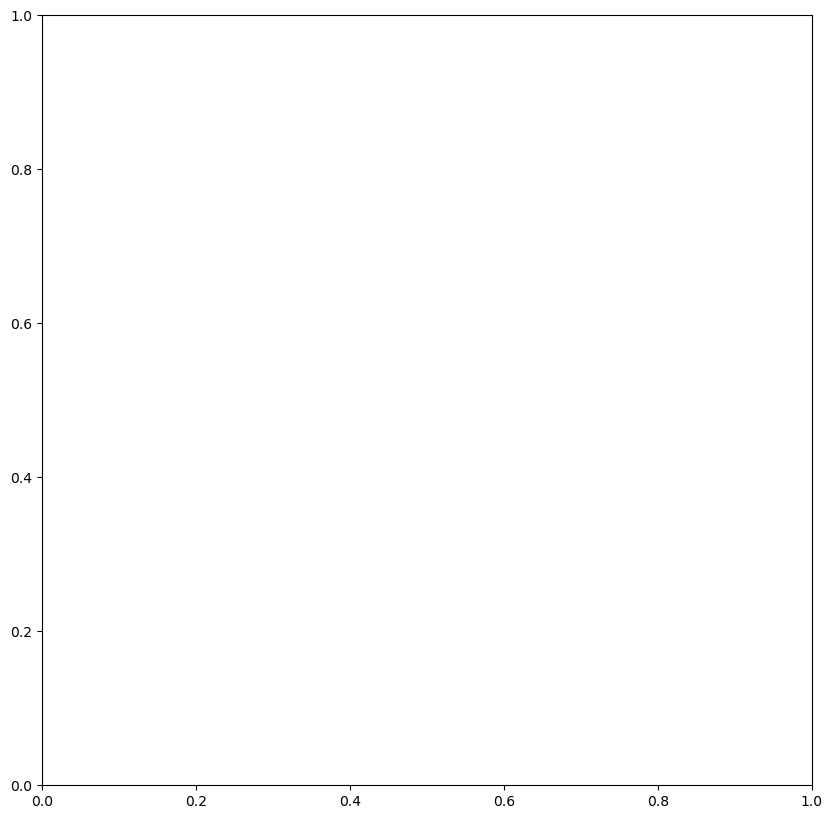

In [127]:

iw = 32

x,y,u,v,R = [],[],[],[],[]
for k in range(0,a.shape[0],iw):
    for m in range(0,a.shape[1],iw):
        ia = a[k:k+iw,m:m+iw]
        ib = b[k:k+iw,m:m+iw]
        ##cross-correlation
        c = correlate2d(ia,ib)
        i,j = np.unravel_index(c.argmax(), c.shape)
        
        x.append(k+iw/2.)
        y.append(m+iw/2.)
        u.append(j)
        v.append(i)
        R.append(c)

figure(figsize=(12,10))
plt.imshow(real(R))
#M = sqrt(pow(array(u), 2) + pow(array(v), 2))
#quiver(x,y,u,v,M)
#colorbar()
        

In [80]:
print(np.mean(u))
print(np.mean(v))
print(np.mean(M))
print(arctan(np.max(v) / np.max(u)))

-5.106508875739645
-9.071005917159763
10.417636061868857
1.0636978224025597
